In [1]:
import torch
import torch.nn as nn
class AlexNet(nn.Module):
  def __init__(self,num_classes=1000):
    super(AlexNet,self).__init__()
    self.features=nn.Sequential(
      nn.Conv2d(3,64,kernel_size=11,stride=4,padding=2),
      nn.ReLU(inplace=True),
      nn.MaxPool2d(kernel_size=3,stride=2),
      nn.Conv2d(64,192,kernel_size=5,padding=2),
      nn.ReLU(inplace=True),
      nn.MaxPool2d(kernel_size=3,stride=2),
      nn.Conv2d(192,384,kernel_size=3,padding=1),
      nn.ReLU(inplace=True),
      nn.Conv2d(384,256,kernel_size=3,padding=1),
      nn.ReLU(inplace=True),
      nn.Conv2d(256,256,kernel_size=3,padding=1),
      nn.ReLU(inplace=True),
      nn.MaxPool2d(kernel_size=3,stride=2),
    )
    self.avgpool=nn.AdaptiveAvgPool2d((6,6))
    self.classifier=nn.Sequntial(
      nn.Dropout(),
      nn.Linear(256*6*6,4096),
      nn.ReLU(inplace=True),
      nn.Dropout(),
      nn.Linear(4096,4096),
      nn.ReLU(inplace=True),
      nn.Linear(4096,num_classes),
     )
    def forward(self,x):
      x=self.features(x)
      x=self.avgpool(x)
      x=torch.flatten(x,1)
      x=self.classifier(x)
      return x

    model=AlexNet()
    print(model)

In [ ]:
import torch
from torchvision import models,transforms
from PIL import Image
import requests
import io
import matplotlib.pyplot as plt
preprocess=transforms.Compose([
  transforms.Resize(256),
  transforms.CenterCrop(224),
  transforms.ToTensor(),
  transforms.Normalize(mean=[0.485,0.456,0.406],std=[0.229,0.224,0.225]),
])

model=models.alexnet(pretrained=True)
model.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:02<00:00, 101MB/s]


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
url="https://yellowverandah.in/cdn/shop/products/IMG_1660_810x.jpg?v=1664791983"
 #url for a vase (we can give any link of the images related in LABELS_URL)
response=requests.get(url)
img=Image.open(io.BytesIO(response.content))
img_tensor=preprocess(img)
img_tensor=img_tensor.unsqueeze(0)
with torch.no_grad():
  output=model(img_tensor)

In [ ]:
LABELS_URL="https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json"
labels = requests.get(LABELS_URL).json()
_,predicted_idx=torch.max(output,1)
predicted_label=labels[predicted_idx.item()]

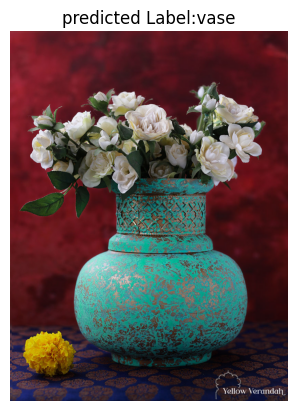

In [ ]:
plt.imshow(img)
plt.title(f"predicted Label:{predicted_label}")
plt.axis('off')
plt.show()